# sklearn 的简单例子

p.2 - p.6

单的线性回归预测google公司股票价格走势

## Regression Intro - Practical Machine Learning Tutorial with Python p.2

https://www.youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=2


In [1]:
import pandas as pd 
import quandl

我们可以从“https://www.quandl.com”网站搜索并获取数据

In [2]:
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head(10)
df.tail(10)
len(df)
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.shape

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.95,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.10,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.28,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,102.32,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-09-01,957.47,958.3300,950.280,951.99,1034769.0,0.0,1.0,957.47,958.3300,950.280,951.99,1034769.0
2017-09-05,946.86,951.3854,935.600,941.48,1455058.0,0.0,1.0,946.86,951.3854,935.600,941.48,1455058.0
2017-09-06,943.87,944.5000,932.680,942.02,1375952.0,0.0,1.0,943.87,944.5000,932.680,942.02,1375952.0
2017-09-07,944.25,950.4965,937.530,949.89,1103286.0,0.0,1.0,944.25,950.4965,937.530,949.89,1103286.0
2017-09-08,949.70,950.7000,940.010,941.41,996449.0,0.0,1.0,949.70,950.7000,940.010,941.41,996449.0
2017-09-11,947.20,952.6800,941.000,943.29,1317796.0,0.0,1.0,947.20,952.6800,941.000,943.29,1317796.0
2017-09-12,946.92,948.0850,937.500,946.65,1245767.0,0.0,1.0,946.92,948.0850,937.500,946.65,1245767.0
2017-09-13,945.50,952.8500,944.740,950.44,1092849.0,0.0,1.0,945.50,952.8500,944.740,950.44,1092849.0
2017-09-14,946.00,948.0300,938.356,940.13,1415168.0,0.0,1.0,946.00,948.0300,938.356,940.13,1415168.0


3293

(3293, 5)

In [4]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [5]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

## Regression Features and Labels - Practical Machine Learning Tutorial with Python p.3
https://www.youtube.com/watch?v=lN5jesocJjk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=3

In [6]:
forecast_col = 'Adj. Close'
df.fillna(-9999,inplace=True)   #如果存在空值，则用-9999填充。数据清洗。

将价格移动一下，用shift(-N) 将未来N天的值拉回当前。 这里N=df/100=38，所以在最后的38个数字是空的。而前面不是空值，所以用这些作为预测值，以供学习。

In [7]:
import math
forecast_out=int(math.ceil(0.01*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)
df.tail(50)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-07-07,940.8100,0.409222,1.055334,1614080.0,942.58
2017-07-10,951.0000,0.223975,0.960773,1409850.0,936.89
2017-07-11,953.5300,0.142628,0.316669,1444540.0,930.50
2017-07-12,967.6600,0.203584,0.707699,1589548.0,928.13
2017-07-13,968.7175,1.030486,-0.214514,1519987.0,935.75
2017-07-14,976.9100,0.064489,0.298768,1048240.0,943.63
2017-07-17,975.9600,0.757203,-0.036873,1644618.0,955.24
2017-07-18,986.9500,0.395157,1.396195,1398920.0,951.99
2017-07-19,992.7700,0.285061,0.278785,1392709.0,941.48


In [8]:
df.dropna(inplace=True)   # 我们将空值去除（也就是最后的空值啦，因为前面已经对空值做了-9999的操作）
df.tail(50) #发现最后的空值数据没有了

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-05-19,954.6500,0.514325,0.192061,1327354.0,940.8100
2017-05-22,964.0700,0.077795,0.738767,1305246.0,951.0000
2017-05-23,970.5500,0.408016,0.060827,1529617.0,953.5300
2017-05-24,977.6100,0.051657,0.240961,1128880.0,967.6600
2017-05-25,991.8600,0.395217,1.313585,1951402.0,968.7175
2017-05-26,993.2700,0.314114,0.128024,1622807.0,976.9100
2017-05-30,996.1700,0.145557,0.369773,1511472.0,975.9600
2017-05-31,987.0900,1.267362,-0.915470,1703990.0,986.9500
2017-06-01,988.2900,0.490747,-0.269436,1295552.0,992.7700


## Regression Training and Testing - Practical Machine Learning Tutorial with Python p.4
https://www.youtube.com/watch?v=r4mwkS2T9aI&index=4&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

In [9]:
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression
import numpy as np

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 数据预处理

preprocessing.scale 数据标准化，具体可以看：

http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

http://blog.csdn.net/Dream_angel_Z/article/details/49406573
                                                                         
http://www.cnblogs.com/chaosimple/p/4153167.html

In [10]:
df.head(10)
X = np.array(df.drop(['label'],1)) # 复制一份df，但不要'label'那一列，因为那个属于y值。
X[:10,]
y = np.array(df['label'])               # 复制一份''label
X= preprocessing.scale(X)          
X[:10,]
y=np.array(df['label']) 

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,68.752232
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.639972
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,69.078238
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,67.839414
2004-08-25,53.164113,1.886792,1.183658,9188600.0,68.912727
2004-08-26,54.122070,0.037068,2.820391,7094800.0,70.668146
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,71.219849
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,72.278116
2004-08-31,51.343492,1.308977,0.048866,4917800.0,74.810934


array([[  5.03228418e+01,   3.71256291e+00,   3.24967503e-01,
          4.46590000e+07],
       [  5.43226889e+01,   7.10922353e-01,   7.22700723e+00,
          2.28343000e+07],
       [  5.48693765e+01,   3.72943327e+00,  -1.22788010e+00,
          1.82561000e+07],
       [  5.25973630e+01,   6.41746925e+00,  -5.72635743e+00,
          1.52473000e+07],
       [  5.31641125e+01,   1.88679245e+00,   1.18365788e+00,
          9.18860000e+06],
       [  5.41220696e+01,   3.70679270e-02,   2.82039066e+00,
          7.09480000e+06],
       [  5.32393448e+01,   2.32689590e+00,  -1.80388529e+00,
          6.21170000e+06],
       [  5.11629351e+01,   3.41143025e+00,  -3.10600304e+00,
          5.19670000e+06],
       [  5.13434924e+01,   1.30897724e+00,   4.88663018e-02,
          4.91780000e+06],
       [  5.02802102e+01,   2.71321696e+00,  -2.38558909e+00,
          9.13820000e+06]])

array([[-1.48311145,  2.30917038,  0.23047825,  4.3847478 ],
       [-1.46497796, -0.32027877,  4.77664553,  1.76521024],
       [-1.46249953,  2.32394888, -0.79233605,  1.21570593],
       [-1.47279981,  4.67867915, -3.75534861,  0.85457086],
       [-1.47023042,  0.70978815,  0.79607194,  0.12736763],
       [-1.46588748, -0.91057794,  1.8741389 , -0.12394339],
       [-1.46988935,  1.09532053, -1.17173345, -0.2299386 ],
       [-1.47930285,  2.04537696, -2.0293995 , -0.35176528],
       [-1.47848428,  0.20361971,  0.04861864, -0.3852406 ],
       [-1.48330472,  1.43373932, -1.55488436,  0.12131831]])

#### 切割训练集、测试集

In [11]:
X_train ,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2)
len(X_train) ,len(X_test),len(X)

(2608, 652, 3260)

#### 模型训练与预测

In [12]:
# training 用线性模型
clf=LinearRegression()
clf.fit(X_train,y_train)

# test
clf.score(X_train,y_train )
clf.score(X_test,y_test)    # the accuracy of  predict


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.97492106180414317

0.97385502728410633

In [13]:
# training 用svm模型
clf=svm.SVR()
clf.fit(X_train,y_train)

# test
clf.score(X_train,y_train ) 
clf.score(X_test,y_test)    # the accuracy of  predict


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.81680230085487682

0.78733297652936096

In [14]:
# training 用svm模型
clf=svm.SVR(kernel='poly')
clf.fit(X_train,y_train)

# test
clf.score(X_train,y_train ) 
clf.score(X_test,y_test)    # the accuracy of  predict


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.66282784481149415

0.67467291864902701

## Regression forecasting and predicting - Practical Machine Learning Tutorial with Python p.5
https://www.youtube.com/watch?v=QLVMqwpOLPk&index=5&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

In [15]:
X = np.array(df.drop(['label'],1)) # 复制一份df，但不要'label'那一列，因为那个属于y值。
y = np.array(df['label'])               # 复制一份''label

X= preprocessing.scale(X)          

X_lately = X[-forecast_out:]
X=X[:-forecast_out] 
y=y[:-forecast_out] 

X_train ,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
forecast_set = clf.predict(X_lately)
(forecast_out,accuracy,forecast_set)

(33,
 0.9710002210994394,
 array([  981.26645118,   973.89265843,   972.40307601,   989.08870442,
          982.38467114,   992.82095461,   990.79707786,  1000.23864698,
          984.66552948,   960.40716266,   974.46228235,   950.32863406,
          942.38569002,   932.3434148 ,   945.72197387,   940.843189  ,
          954.44661839,   964.92408632,   967.63081387,   981.62839864,
          982.1190079 ,   991.29613934,   989.55545511,  1000.75410561,
         1006.88075697,  1006.08579912,  1008.05412615,  1011.35381726,
          981.09157331,   978.68333665,   964.64773258,   971.98957684,
          958.20999787]))

In [17]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

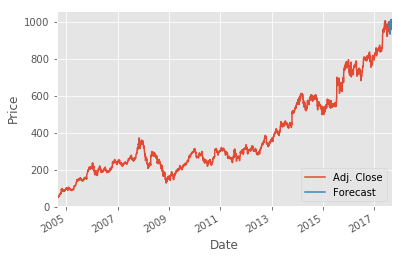

In [18]:
df['Forecast'] =np.nan

last_date=df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix=last_unix + one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Pickling and Scaling - Practical Machine Learning Tutorial with Python p.6
https://www.youtube.com/watch?v=za5s7RB_VLw&index=6&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

保存训练结果，下次直接调用就可以做预测，一般在预测结束之后，预测开始之前进行保存。

In [19]:
import pickle
# 保存
with open('LinearRegression.pickle','wb') as f:
    pickle.dump(clf,f)

In [20]:
# 提取
pickle_in = open('LinearRegression.pickle','rb')
clf_2=pickle.load(pickle_in)

In [21]:
# 预测，并且结果和之前的一至
forecast_set2 = clf_2.predict(X_lately)
forecast_set == forecast_set2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)